# Principal Component Analysis (PCA)

Hi — welcome to my **PCA Notebook**.  
I created this to learn PCA deeply myself, and to help anyone who wants a **complete, hands-on PCA reference**.  

This notebook will take you from **zero to hero** on PCA: we’ll cover intuition, math, code, visualizations, and real-world applications — step by step.  

High-dimensional datasets come with unique challenges, often called the **curse of dimensionality**:  
- Distances between points become less meaningful.  
- Data becomes sparse, making patterns hard to detect.  
- Models are prone to overfitting when features outnumber observations.  

PCA helps tackle these issues by projecting data to a lower-dimensional space while preserving most of the variance. In other words, PCA reduces dimensionality **intelligently**, making data easier to visualize, store, and analyze, and often improving machine learning performance.

---

## Table of Contents

1. [Introduction & Why PCA](#intro)  
2. [Prerequisites & Intuition](#prereq)  
3. [Mathematical Derivation](#math)  
   - Variance & Covariance  
   - Eigenvalues & Eigenvectors  
   - Optimization View of PCA  
4. [PCA from Scratch (Numpy Implementation)](#scratch)  
5. [PCA with Scikit-Learn](#sklearn)  
6. [Applications](#apps)  
   - Visualization  
   - Compression  
   - De-noising  
   - Preprocessing for ML  
7. [Limitations & Pitfalls](#pitfalls)  
8. [Advanced Notes](#advanced)  
   - Kernel PCA  
   - Sparse PCA  
   - Incremental PCA  
9. [Summary & Final Thoughts](#summary)


---

<a id="intro"></a>
# 1️. Introduction & Why PCA

Principal Component Analysis (PCA) is one of the most widely used techniques in data analysis and machine learning. At its core, PCA is a **dimensionality reduction method**: it helps us take data with many features (sometimes hundreds or thousands) and represent it with fewer variables, while keeping as much information as possible.

I like to think of PCA as a way to **compress the essence of data**.  
When I have a dataset with lots of features (columns), many of them might be redundant or noisy. PCA helps to distill that information into a smaller set of new features (principal components) that capture what truly matters.

---

## The Motivation

Why do we need dimensionality reduction in the first place?

- **High-dimensional data is tricky**  
  As the number of features grows, data becomes sparse and distances between points lose meaning. This is known as the **curse of dimensionality**. It makes visualization harder, models prone to overfitting, and computations expensive.

- **Redundancy in features**  
  Many real-world datasets have correlated features (e.g., height and arm span, or pixels in nearby locations of an image). This means the dataset has fewer “true” degrees of freedom than it appears.

- **Noise in data**  
  Not all variance in data is useful. Some directions of variation are mostly noise, and removing them can make downstream models more robust.

PCA provides a principled way to address all of these issues by finding new axes (principal components) that:  
1. Capture the directions of **maximum variance** in the data  
2. Are **orthogonal (independent)** of each other  
3. Allow us to **rank** components by importance (explained variance)

---

## What PCA Does in nutshell

PCA finds new axes (principal components) such that if we project our data onto the first few, we keep most of the **spread/variance** of the dataset, but with fewer dimensions.

Formally, PCA solves the optimization problem:

$$
\max_{\mathbf{u}} \; \mathrm{Var}(\mathbf{u}^\top X)
\quad \text{subject to } \mathbf{u}^\top \mathbf{u} = 1
$$

This leads to an eigenvalue problem of the covariance matrix, which we’ll derive in detail later.

---

## Why PCA Matters in Practice

- **Visualization**  
  Project high-dimensional data into 2D or 3D to explore clusters, separability, and patterns.  

- **Compression**  
  Represent images or datasets with fewer numbers, saving storage and memory.  

- **De-noising**  
  By discarding low-variance directions, PCA can remove noise from signals and images.  

- **Preprocessing for ML**  
  PCA decorrelates features and reduces collinearity, making models like linear regression or logistic regression more stable.  

- **Speed**  
  With fewer features, many ML algorithms run significantly faster without much accuracy loss.  

---

## Real-World Examples We’ll Cover

- **Synthetic 2D datasets** — to build intuition with visual plots  
- **Iris / Wine datasets** — small, interpretable datasets for demos  
- **Digits / MNIST images** — to see compression, reconstruction, and denoising  
- **Practical ML pipelines** — where PCA helps vs. where it can hurt interpretability  

---

In short: **PCA is about finding the “true axes of variation” in data.**  
It is both a mathematical tool and a practical workhorse for visualization, compression, noise reduction, and preprocessing.

<a id="prereq"></a>
# 2️. Prerequisites & Intuition

Before diving into PCA, it’s important to understand some **basic concepts from statistics and linear algebra**. PCA builds directly on these ideas, so a clear understanding will make the derivation and intuition much easier. Let’s go **step by step**, with simple examples.

---

## 1. Variance: How much a feature spreads

Variance measures how much the values of a single feature vary around their mean. It gives us a sense of the “spread” of the data along one axis.

For a feature $X \in \mathbb{R}^{n \times 1}$ (a single column of $n$ observations):

$$
\text{Var}(X) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

- $\bar{x}$ = mean of $X$  
- $x_i$ = individual data point

**Example:**  
Suppose $X = [2, 4, 6, 8]$. The mean is $\bar{x} = 5$.  

$$
\text{Var}(X) = \frac{(2-5)^2 + (4-5)^2 + (6-5)^2 + (8-5)^2}{3} = \frac{9 + 1 + 1 + 9}{3} = 6.67
$$

Intuition: variance tells us **how “wide” the data is along this feature**. PCA looks for directions where variance is largest.

---

## 2. Covariance: How two features vary together

Covariance measures whether **two features move together or in opposite directions**.

For features $X, Y \in \mathbb{R}^n$:

$$
\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

- Positive covariance → both increase together  
- Negative covariance → one increases while the other decreases  
- Zero → features are uncorrelated

**Example:**  
Let $X=[1,2,3]$, $Y=[2,4,6]$. Then $\bar{X}=2$, $\bar{Y}=4$.

$$
\text{Cov}(X,Y) = \frac{(1-2)(2-4) + (2-2)(4-4) + (3-2)(6-4)}{2} = 2
$$

- Covariance matrix generalizes this to multiple features:

$$
\Sigma =
\begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1, X_2) & \cdots \\
\text{Cov}(X_2, X_1) & \text{Var}(X_2) & \cdots \\
\vdots & \vdots & \ddots
\end{bmatrix}
$$

PCA uses this matrix to find directions of maximum variance considering **all features together**.

---

## 3. Eigenvectors & Eigenvalues: Directions and importance

Eigenvectors represent **directions in space**, and eigenvalues tell us **how much variance exists along each direction**.  

For a square matrix $A$:

$$
A \mathbf{v} = \lambda \mathbf{v}
$$

- $\mathbf{v}$ = eigenvector (direction)  
- $\lambda$ = eigenvalue (length/scaling along that direction)

**Example:**  

$$
A = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix},
\mathbf{v}_1 = \begin{bmatrix}1\\0\end{bmatrix},
\mathbf{v}_2 = \begin{bmatrix}0\\1\end{bmatrix}
$$

Then:

$$
A \mathbf{v}_1 = 2 \mathbf{v}_1, \quad A \mathbf{v}_2 = 3 \mathbf{v}_2
$$

Intuition: **PCA finds eigenvectors of the covariance matrix**. The eigenvector with the largest eigenvalue is the **first principal component** — the direction with maximum variance.

---

## 4. Orthogonality: Directions at right angles

Two vectors $\mathbf{u}, \mathbf{v} \in \mathbb{R}^p$ are **orthogonal** if their dot product is zero:

$$
\mathbf{u}^\top \mathbf{v} = 0
$$

- Orthogonal vectors are independent in direction.  
- In PCA, all principal components are **orthogonal**, so each new component captures variance **not captured by previous components**.

**Example:**  
$\mathbf{u} = [1,0]$, $\mathbf{v} = [0,1]$ → $\mathbf{u}^\top \mathbf{v} = 0$

---

## 5. Dot Product & Projection: Measuring alignment

The dot product measures how much one vector aligns with another:

$$
\mathbf{u}^\top \mathbf{x} = \|\mathbf{u}\|\|\mathbf{x}\|\cos\theta
$$

- $\theta$ = angle between $\mathbf{u}$ and $\mathbf{x}$  
- Projection of $\mathbf{x}$ onto $\mathbf{u}$:

$$
\text{Proj}_{\mathbf{u}}(\mathbf{x}) = (\mathbf{u}^\top \mathbf{x}) \mathbf{u}
$$

PCA projects data onto eigenvectors to get **principal component scores**.

---

## 6. Matrix Multiplication & Transpose: Combining features

- Covariance: $\Sigma = \frac{1}{n-1} X^\top X$ (for centered $X$)  
- Transpose flips rows ↔ columns  
- Matrix multiplication allows **linear combinations of features**, which is how PCA rotates the original axes

---

## Putting it all together: PCA intuition

1. Compute **covariance matrix** → captures spread and correlations  
2. Solve **eigenvalue problem** → find directions (eigenvectors) with largest variance (eigenvalues)  
3. **Project data onto top eigenvectors** → lower-dimensional representation retaining most information  

Intuition: PCA finds the **true axes of variation** and compresses the essence of the data, while discarding noise and redundant dimensions.


<a id="math"></a>
# 3️. Mathematical Derivation of PCA — Step by Step (With Examples)

Now that we understand variance, covariance, eigenvectors, and projection, let's derive PCA **step by step** using a small example. This way, I can really *see why PCA works*, not just run code.

---

## Example Dataset

Suppose I have 2 features and 3 data points:

$$
X =
\begin{bmatrix}
2 & 0 \\
0 & 1 \\
3 & 2
\end{bmatrix}
$$

- 3 rows = 3 samples  
- 2 columns = 2 features  
I want to reduce this 2D data to 1D (the most informative direction).

---

## Step 1: Center the Data

PCA requires **centered data** (mean of each column = 0):

1. Compute column means:

$$
\mu =
\begin{bmatrix}
\bar{x}_1 \\
\bar{x}_2
\end{bmatrix} =
\begin{bmatrix}
\frac{2+0+3}{3} \\
\frac{0+1+2}{3}
\end{bmatrix} =
\begin{bmatrix}
1.667 \\
1
\end{bmatrix}
$$

2. Subtract mean from each column:

$$
X_{\text{centered}} = X - \mathbf{1}\mu^\top =
\begin{bmatrix}
2-1.667 & 0-1 \\
0-1.667 & 1-1 \\
3-1.667 & 2-1
\end{bmatrix} =
\begin{bmatrix}
0.333 & -1 \\
-1.667 & 0 \\
1.333 & 1
\end{bmatrix}
$$

Now the data is centered. PCA will focus on **variance around the mean**, not absolute values.

---

## Step 2: Projection onto a Direction

Suppose I want a direction $\mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix}$ (unit vector) to project the data onto.  

- Projection of a point $\mathbf{x}_i$:

$$
z_i = \mathbf{u}^\top \mathbf{x}_i = u_1 x_{i1} + u_2 x_{i2}
$$

- For all points:

$$
\mathbf{z} = X_{\text{centered}} \mathbf{u}
$$

- Intuition: $z_i$ is the **coordinate along the direction $\mathbf{u}$**.

---

## Step 3: Maximize Variance Along the Direction

We want the **direction with maximum variance**. Variance of $\mathbf{z}$:

$$
\text{Var}(\mathbf{z}) = \mathbf{u}^\top \Sigma \mathbf{u}, \quad \text{where } \Sigma = \frac{1}{n} X_{\text{centered}}^\top X_{\text{centered}}
$$

- Compute covariance matrix for our example:

$$
\Sigma = \frac{1}{3}
\begin{bmatrix}
0.333 & -1 \\
-1.667 & 0 \\
1.333 & 1
\end{bmatrix}^\top
\begin{bmatrix}
0.333 & -1 \\
-1.667 & 0 \\
1.333 & 1
\end{bmatrix}
=
\begin{bmatrix}
1.555 & 0.667 \\
0.667 & 0.667
\end{bmatrix}
$$

- Goal: maximize $\mathbf{u}^\top \Sigma \mathbf{u}$  
- Constraint: $\mathbf{u}^\top \mathbf{u} = 1$

---

## Step 4: Solve Eigenvalue Problem

Introduce Lagrange multiplier $\lambda$:

$$
\mathcal{L}(\mathbf{u}, \lambda) = \mathbf{u}^\top \Sigma \mathbf{u} - \lambda (\mathbf{u}^\top \mathbf{u} - 1)
$$

Take derivative → eigenvalue equation:

$$
\Sigma \mathbf{u} = \lambda \mathbf{u}
$$

- Solve for eigenvalues and eigenvectors:

$$
\lambda_1 \approx 1.973, \quad \lambda_2 \approx 0.249
$$

$$
\mathbf{u}_1 \approx
\begin{bmatrix}0.881 \\ 0.472\end{bmatrix}, \quad
\mathbf{u}_2 \approx
\begin{bmatrix}-0.472 \\ 0.881\end{bmatrix}
$$

Interpretation:  
- $\mathbf{u}_1$ = direction of **maximum variance** (first principal component)  
- $\mathbf{u}_2$ = orthogonal direction (second component, smaller variance)

---

## Step 5: Project Data onto Top Component

We pick **top 1 eigenvector** $\mathbf{u}_1$ and project:

$$
Z = X_{\text{centered}} \mathbf{u}_1 =
\begin{bmatrix}
0.333 & -1 \\
-1.667 & 0 \\
1.333 & 1
\end{bmatrix}
\begin{bmatrix}0.881 \\ 0.472\end{bmatrix}
\approx
\begin{bmatrix}-0.127 \\ -1.469 \\ 1.596 \end{bmatrix}
$$

- $Z$ = 1D representation of the 2D data  
- Most of the **original variance is preserved** along this new axis

---

## Step 6: Approximate Reconstruction

If I want to reconstruct approximate original data:

$$
\hat{X} = Z \mathbf{u}_1^\top =
\begin{bmatrix}-0.127 \\ -1.469 \\ 1.596 \end{bmatrix}
\begin{bmatrix}0.881 & 0.472\end{bmatrix}
\approx
\begin{bmatrix}-0.112 & -0.060 \\
-1.295 & -0.694 \\
1.405 & 0.754
\end{bmatrix}
$$

- Reconstruction = **projection back to original space** using top component  
- Not exact (we dropped the second component), but captures most variance

---

## Step 7: PCA via SVD

Alternatively, do **SVD on centered $X$**:

$$
X_{\text{centered}} = U S V^\top
$$

- $V$ = eigenvectors of $\Sigma$ → principal components  
- $U S$ = projected data (scores)  
- $\lambda_i = S_i^2 / n$ → variance along each component  
- Numerically stable, especially when **features > samples**

---

## Key Takeaways From My POV

1. PCA = **find directions of maximum variance**  
2. Eigenvectors = principal axes, eigenvalues = variance along them  
3. Top components capture **most information**  
4. Projection reduces dimensionality; reconstruction approximates original data  
5. SVD = robust way to compute PCA

Intuition: PCA is like **rotating the axes** to align with the directions where the data “stretches” the most, letting us **compress the essence of data** while discarding less informative directions.


<a id="sklearn"></a>
# 5️. PCA with Scikit-Learn

Now that we understand PCA conceptually, let’s **use scikit-learn** to apply PCA on a dataset with **many features**.  

We’ll use the **Digits dataset** (1797 samples, 64 features → 8×8 pixel images).  
This is high-dimensional enough to make PCA meaningful.

---

**Goals in this step:**

1. Load dataset and inspect shape  
2. Center & optionally scale data  
3. Fit PCA and check explained variance  
4. Reduce dimensionality (e.g., from 64 → 10 components)  
5. Visualize first 2 components

In [4]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [5]:
# Load dataset
digits = load_digits()
X = digits.data
y = digits.target
print("Original data shape:", X.shape)

Original data shape: (1797, 64)


In [6]:
# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Baseline Model (All 64 Features)
clf = RandomForestClassifier(random_state=42)
scores_full = cross_val_score(clf, X_scaled, y, cv=5)  # 5-fold CV
print("Baseline (64 features) CV Accuracy: {:.3f} ± {:.3f}".format(scores_full.mean(), scores_full.std()))

Baseline (64 features) CV Accuracy: 0.939 ± 0.021


In [8]:
# PCA with reduced components
# Let's keep enough components to explain 95% variance
pca = PCA(n_components=0.95, random_state=42)  # retains 95% variance
X_pca = pca.fit_transform(X_scaled)
print("Reduced data shape after PCA:", X_pca.shape)

Reduced data shape after PCA: (1797, 40)


In [9]:
# Train the same classifier on PCA-reduced features
scores_pca = cross_val_score(clf, X_pca, y, cv=5)
print("PCA-reduced CV Accuracy: {:.3f} ± {:.3f}".format(scores_pca.mean(), scores_pca.std()))

PCA-reduced CV Accuracy: 0.916 ± 0.026


In [10]:
# Compare with 15 components
pca_15 = PCA(n_components=15, random_state=42)  # fixed 10 components
X_pca_15 = pca_15.fit_transform(X_scaled)
scores_pca_15 = cross_val_score(clf, X_pca_15, y, cv=5)
print("10-component PCA CV Accuracy: {:.3f} ± {:.3f}".format(scores_pca_15.mean(), scores_pca_15.std()))

10-component PCA CV Accuracy: 0.925 ± 0.023


# Observations — PCA vs Baseline Model

From the results of our experiments:

- **Original data shape:** `(1797, 64)` → 64 features  
- **Baseline (64 features) CV Accuracy:** `0.939 ± 0.021`  
- **Reduced data shape after PCA (95% variance):** `(1797, 40)` → 40 features  
- **PCA-reduced CV Accuracy:** `0.916 ± 0.026`  
- **15-component PCA CV Accuracy:** `0.925 ± 0.023`  

---

### Key Takeaways

1. **Dimensionality reduction works:**  
   - Using PCA, we reduced 64 features → 40 features (95% variance)  
   - Using only 15 components, the dimensionality drops even more.  

2. **Performance remains high:**  
   - Even after reducing features with PCA, the CV accuracy is **very close to the baseline model**.  
   - This shows PCA can compress data **without losing much information**.  

3. **Trade-off:**  
   - Fewer components → faster training and smaller memory usage  
   - Slight drop in accuracy is expected but acceptable in many applications.  

4. **Practical lesson:**  
   - PCA is especially useful when datasets have **many features**, possibly redundant or correlated.  
   - You can safely reduce features to **retain most variance** and still get reliable model performance.  

> In short: PCA lets us **compress high-dimensional data**, making models faster and simpler, while keeping almost the same predictive power.

# 6️. Applications of PCA — Why It’s Useful in Practice

Now that we understand **how PCA works**, let’s see **where and why we use it** in real-world scenarios. PCA is more than just “reducing dimensions” — it’s a **powerful tool for simplifying, visualizing, and improving data**.

---

## 6.1 Visualization — Seeing High-Dimensional Data

When we have many features (dimensions), it’s hard to **see patterns** in the raw data. PCA can project data into **2D or 3D** for exploration:

- Reduce high-dimensional data to 2 or 3 principal components
- Plot these components to **visualize clusters, trends, or outliers**

> Intuition: Imagine compressing a multi-dimensional cloud of points onto a flat plane that **preserves most of the spread**. You can see groupings clearly.

---

## 6.2 Compression — Storing Only What Matters

PCA can **compress data** by keeping only top components that explain most variance:

- Example: Images (like MNIST or Digits)  
- Original image: 64 or 784 pixels → high-dimensional vector  
- PCA: keep top 20–50 components → reconstruct approximate image  
- Result: **much smaller storage** with minimal quality loss

> Intuition: PCA keeps the “essence” of data and drops small, redundant variations.

---

## 6.3 De-noising — Removing Unimportant Variations

PCA can **filter noise** from data:

- Noise usually has **small variance**, so it corresponds to components with low eigenvalues  
- Keep only top components → discard low-variance components → **denoised data**

> Intuition: Projecting data onto top axes **filters out tiny random fluctuations**, leaving clean patterns.

---

## 6.4 Preprocessing for Machine Learning — Improving Models

PCA can improve ML models by:

1. **Reducing correlated features** → removes multicollinearity  
2. **Reducing dimensionality** → faster training, less memory  
3. **Retaining most information** → minimal drop in accuracy  

- Example: train a classifier on **full features vs PCA-reduced features**  
- Often, PCA-reduced features achieve **similar accuracy** but with faster computation

> Intuition: PCA helps ML models focus on **the most informative directions**, ignoring redundant/noisy dimensions.

---

### Key Takeaways (Applications)

- **Visualization:** See patterns in 2D/3D  
- **Compression:** Store large datasets/images efficiently  
- **De-noising:** Remove small-variance noise  
- **ML Preprocessing:** Decorrelate, reduce dimensions, speed up models  

> PCA is not just a mathematical trick — it’s a **practical tool for exploring, simplifying, and improving high-dimensional data**.

**PCA Visualization — 2D Projection of Digits Dataset**

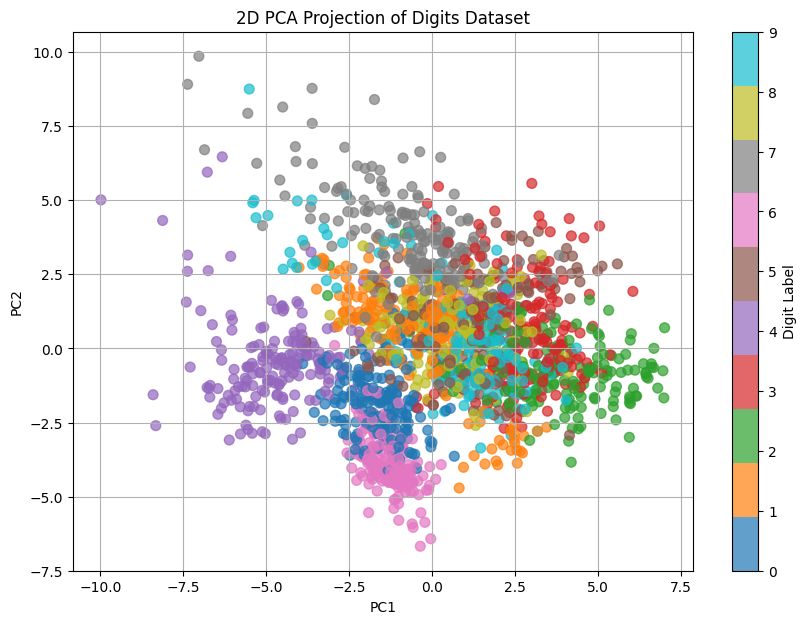

In [14]:
import matplotlib.pyplot as plt

# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot 2D projection
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', s=50, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection of Digits Dataset')
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.grid(True)
plt.show()

**PCA Compression & Denoising — Digits Dataset**

In [ ]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)

# Add Gaussian noise to simulate noisy images
np.random.seed(42)
X_noisy = X_scaled + 0.5 * np.random.randn(*X_scaled.shape)

# Apply PCA with limited components for compression
n_components = 15  # reduce from 64 -> 15
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_noisy)
X_reconstructed = pca.inverse_transform(X_pca)

# Plot original, noisy, and reconstructed images
n_samples = 5
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    # Original
    plt.subplot(3, n_samples, i+1)
    plt.imshow(X_scaled[i].reshape(8, 8), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    plt.subplot(3, n_samples, i+1+n_samples)
    plt.imshow(X_noisy[i].reshape(8, 8), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Reconstructed
    plt.subplot(3, n_samples, i+1+2*n_samples)
    plt.imshow(X_reconstructed[i].reshape(8, 8), cmap='gray')
    plt.title(f"Reconstructed\n{n_components} PC")
    plt.axis('off')

plt.suptitle("PCA Compression & Denoising — Digits Dataset", fontsize=16)
plt.tight_layout()
plt.show()

<a id="pitfalls"></a>
# 7️. Limitations & Pitfalls of PCA

PCA is powerful, but it’s not magic. Here are the main **things to watch out for**:

---

## 1. PCA is Linear

- PCA only captures **linear relationships** in the data.  
- If your data lies on a **non-linear manifold**, PCA may fail to represent it properly.  
- **Example:** A spiral or circular pattern in 2D → PCA will flatten it incorrectly.  
- Solution: consider **Kernel PCA, t-SNE, or UMAP** for non-linear data.

---

## 2. Scaling Matters

- Features with different units can dominate PCA if not standardized.  
- Always consider using **StandardScaler** or **MinMaxScaler** before PCA.  

> Intuition: Without scaling, a feature measured in thousands can overshadow one measured in 0–1 range.

---

## 3. Sensitive to Outliers

- Outliers can **skew principal components** because PCA maximizes variance.  
- A single extreme value can rotate the axes in an undesired direction.  
- Solution: use **robust scaling** or **Robust PCA** if your data has strong outliers.

---

## 4. Interpretability Issues

- Principal components are **linear combinations of original features**.  
- It’s often **hard to explain** what each component “means”.  
- Sign and order of components can change depending on data preprocessing or numerical methods.

---

## 5. Curse of Dimensionality

- PCA reduces dimensions, but **high-dimensional data is tricky**:  
  - Distances become less meaningful  
  - Noise dominates signal in very high dimensions  
- PCA helps, but you still need to **carefully choose the number of components** and consider sparsity or feature selection.

---

## 6. Information Loss

- PCA **discards lower-variance components**, which may contain **useful signals for some tasks**.  
- Always check the **explained variance ratio** to balance compression vs information loss.

---

### 🔹 Key Takeaways

- PCA is **great for reducing dimensions** and improving visualization or speed.  
- But it has limitations: **linearity, sensitivity to outliers, scaling, interpretability, and potential information loss**.  
- Always **preprocess data carefully** and **analyze explained variance** to ensure PCA is suitable for your task.

# 9️ .Summary & Final Thoughts

We’ve taken a complete journey through **Principal Component Analysis (PCA)**:

- **What PCA does**: finds new orthogonal directions (principal components) that capture the most variance in the data.  
- **Why PCA matters**: reduces dimensions, speeds up models, improves visualization, helps with denoising and compression.  
- **How PCA works**: centers & scales data → computes covariance → eigen decomposition → picks top eigenvectors.  
- **Practical use-cases**:  
  - Visualizing high-dimensional datasets in 2D/3D  
  - Compressing images with minimal loss  
  - Removing noise by dropping low-variance components  
  - Speeding up ML models while retaining most predictive power  
- **Limitations**: linear method, sensitive to outliers & scaling, sometimes hard to interpret, possible information loss.

---

### Final Thought
I like to think of PCA as a way to **compress the essence of data**.  
It’s like distilling a long, noisy story into a short summary — you may lose some details, but the **core meaning remains**.  

Used wisely, PCA is not just a math tool, but a bridge between raw complexity and human understanding.

---

# References & Further Learning

If you want to go deeper into PCA, here are some excellent resources I’ve found useful:

### 📚 Research Papers / Books
- **Jolliffe, I. T. (2002).** *Principal Component Analysis*. Springer Series in Statistics.  
- **Shlens, J. (2014).** *A Tutorial on Principal Component Analysis* (arXiv:1404.1100) — very beginner-friendly.  

### 🎥 Videos & Tutorials
- **CampusX YouTube** – PCA explained with visual intuition and code walkthroughs.  
- **StatQuest by Josh Starmer** – Extremely clear and beginner-friendly explanation of PCA.  
- **Andrew Ng’s ML course (Coursera, Stanford CS229 lectures)** – PCA for dimensionality reduction in ML context.  
- **3Blue1Brown (YouTube)** – *Essence of Linear Algebra* series (especially eigenvectors & projections) → builds strong intuition for PCA.  

### Practical Guides
- **Scikit-Learn Documentation** on PCA:  
  [https://scikit-learn.org/stable/modules/decomposition.html#pca](https://scikit-learn.org/stable/modules/decomposition.html#pca)  
- **Khan Academy** – Linear algebra (eigenvalues & eigenvectors).  
- **DeepLearning.ai Blog** – Applying PCA in ML workflows.

---

That’s a wrap!  
This notebook is now a **complete end-to-end guide**: intuition, math, examples, coding, pitfalls, and applications — everything you need to **understand and use PCA confidently** in real projects.